<a href="https://www.kaggle.com/code/youssefzeroual/google-capstone-data-analysis-project-cyclistic?scriptVersionId=171251823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="text-align:center; font-family:Arial, sans-serif; color:#336699;"> Pedaling Towards Membership: Analyzing Cyclistic's Bike-Share Potential</h1>
<p style="text-align:center; color:#666666; font-family:Calibri, sans-serif; font-size:20px;">Unveiling Usage Patterns for Enhanced Membership Growth</p>



<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Introduction</h1>


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
      <br>
        The present documentation describes all the steps that have been taken in the process of data analysis applied to a case study in order to accomplish the Google Data analytics capstone project.
        This document presents an analysis of Cyclistic's historical trip data to identify trends in bike usage among different customer types. The data was obtained from Motivate International Inc. and covers the previous 12 months of Cyclistic trip data. In order to answer the business questions, we follow the steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act.
    </p>
</div>


<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Step 1: Ask</h1>


 
<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
## 1.1 Context  

Cyclistic, launched in 2016, has evolved into a successful bike-share program with 5,824 bicycles and 692 stations in Chicago. Their pricing plans, including single-ride passes, full-day passes, and annual memberships, have attracted a broad consumer base. Annual members, identified as more profitable by finance analysts, are crucial for future growth according to Moreno, the director of marketing. She aims to convert casual riders into members by understanding their differences and motivations. Analyzing historical bike trip data is key to identifying trends and designing effective marketing strategies.

## 1.2 Scenario

You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## 1.3 Informations about Stakeholders

- **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
- **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals—as well as how you, as a junior data analyst, can help Cyclistic achieve them.
- **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.





## 1.4 Business Task

This analysis aims to answer the following question :How do annual members and casual riders use Cyclistic bikes differently?

In order to answer the question, we will proceed to the Analyze of the differences in usage patterns between annual members and casual riders to provide insights for targeted marketing strategies.


### 1.5 Data Location

The data is stored in monthly CSV files, with each file containing trip data for a specific month. These files can be accessed and downloaded from the following link: [Cyclistic Trip Data](https://divvy-tripdata.s3.amazonaws.com/index.html).

---
        
     

   

<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Step 2: Preparing the data

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
        
### 2.1 Data overview
Each month's trip data is organized in a separate CSV file. The data includes information such as ride ID, rideable type, start and end timestamps, start and end station names, member type, and geographic coordinates.

#### Bias and Credibility
The data represents ridership for two types of customers: members and casual riders. No additional demographic information (e.g., age, sex, gender, race) is provided. We assume that the data is representative of Cyclistic's overall customer base.

#### Licensing, Privacy, Security, and Accessibility
The data has been made available by Motivate International Inc. under the following license: [Data License Agreement](https://divvybikes.com/data-license-agreement). We acknowledge and adhere to the terms of this license regarding data usage, privacy, and security.



---

###  2.2 Collect  and organize Data

####  Downloading Data from  Source: 
  - Downloaded ZIP files for trip data from March 2023 to February 2024 from [https://divvy-tripdata.s3.amazonaws.com/index.html](https://divvy-tripdata.s3.amazonaws.com/index.html).


####  Unzipping Files:
* Extracted the contents of each ZIP file into the "csv" folder using appropriate software.
* Folder Structure:
```
.
└── Case_Study
    └── Cyclistic
        └── 2023-2024
            ├── csv
            │   ├── 202303-divvy-tripdata.csv
            │   ├── 202304-divvy-tripdata.csv
            │   ├── 202305-divvy-tripdata.csv
            │   ├── ...
            └── zip
                ├── 202303-divvy-tripdata.zip
                ├── 202304-divvy-tripdata.zip
                ├── 202305-divvy-tripdata.zip
                ├── 202306-divvy-tripdata.zip
                ├── ...

```
####  Preparing libraries </p>
</div>

In [3]:

library(tidyverse)
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(flexdashboard)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
####  Importing data
 **Selected tool: R language**

The decision to use R and RStudio stems from the need to handle a large dataset efficiently, mitigating the risk of spreadsheet crashes. Additionally, R's flexibility and its ability to produce readable, well-documented code facilitate reproducibility, ensuring that analyses can be easily replicated and shared. These factors make R and RStudio the optimal choice for managing and analyzing complex datasets in a reliable and scalable manner.



In [4]:
# Importing CSV file into a dataframe
# Import CSV files into dataframes for each month

# March 2023
df_202303 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202303-divvy-tripdata/202303-divvy-tripdata.csv")

# April 2023
df_202304 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202304-divvy-tripdata/202304-divvy-tripdata.csv")

# May 2023
df_202305 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202305-divvy-tripdata/202305-divvy-tripdata.csv")

# June 2023
df_202306 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202306-divvy-tripdata/202306-divvy-tripdata.csv")

# July 2023
df_202307 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202307-divvy-tripdata/202307-divvy-tripdata.csv")

# August 2023
df_202308 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202308-divvy-tripdata/202308-divvy-tripdata.csv")

# September 2023
df_202309 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202309-divvy-tripdata/202309-divvy-tripdata.csv")

# October 2023
df_202310 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202310-divvy-tripdata/202310-divvy-tripdata.csv")

# November 2023
df_202311 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202311-divvy-tripdata/202311-divvy-tripdata.csv")

# December 2023
df_202312 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202312-divvy-tripdata/202312-divvy-tripdata.csv")

# January 2024
df_202401 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202401-divvy-tripdata/202401-divvy-tripdata.csv")

# February 2024
df_202402 <- read.csv("/kaggle/input/divvy-tripdata-2022-2023/202402-divvy-tripdata/202402-divvy-tripdata.csv")


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
* Dataframe Naming Convention:
  - Each dataframe is named according to the corresponding CSV file (`df_202303` for data from March 2023).

### 2.3 Data Integrity Verification

The integrity of the data is crucial as it forms the foundation of our analysis. By verifying the data's integrity, we ensure that our findings are based on reliable and accurate information.

To ensure the integrity of the data, several checks were performed:
- Verification of column names in each CSV file.
- Validation of data types to ensure consistency.
- Identification of empty values in critical columns, such as start_station_name and end_station_name.
- Detection of inconsistencies, such as trips with start timestamps occurring after their end timestamps.

Data inspection

#### Inspect the structure of each dataframe


In [5]:
#Displayed only the first one as esxample to reduce output size, uncomment to repreduce the initial result
str(df_202303)
#str(df_202304)
#str(df_202305)
#str(df_202306)
#str(df_202307)
#str(df_202308)
#str(df_202309)
#str(df_202310)
#str(df_202311)
#str(df_202312)
#str(df_202401)
#str(df_202402)

'data.frame':	258678 obs. of  13 variables:
 $ ride_id           : chr  "6842AA605EE9FBB3" "F984267A75B99A8C" "FF7CF57CFE026D02" "6B61B916032CB6D6" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2023-03-16 08:20:34" "2023-03-04 14:07:06" "2023-03-31 12:28:09" "2023-03-22 14:09:08" ...
 $ ended_at          : chr  "2023-03-16 08:22:52" "2023-03-04 14:15:31" "2023-03-31 12:38:47" "2023-03-22 14:24:51" ...
 $ start_station_name: chr  "Clark St & Armitage Ave" "Public Rack - Kedzie Ave & Argyle St" "Orleans St & Chestnut St (NEXT Apts)" "Desplaines St & Kinzie St" ...
 $ start_station_id  : chr  "13146" "491" "620" "TA1306000003" ...
 $ end_station_name  : chr  "Larrabee St & Webster Ave" "" "Clark St & Randolph St" "Sheffield Ave & Kingsbury St" ...
 $ end_station_id    : chr  "13193" "" "TA1305000030" "13154" ...
 $ start_lat         : num  41.9 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.7 -87

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### Data Quality Issues

- Empty values in the start_station_name and end_station_name columns.
- Some trips have start timestamps that come after their end timestamps, indicating potential data entry errors.
- The data type of start and end time stamp is text, which may require conversion to datetime for more robust analysis.
- Data can be only be aggregated at the ride-level, need for more columns (e.g year, month, day, day_of_week)
---

        
        
<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;">Step 3: Processing the data

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
        
**Tools Used**: R language with R Studio

**Reasoning**: R language and R Studio were chosen due to their efficiency in handling large datasets, flexibility in data aggregation, transformation, and visualization tasks.




### Combining the data into a Single File

#### Inspect column names for inconsistencies and naming problems

- **Get Column Names**:
  - Retrieved the column names for each dataframe representing the trip data for different months.

- **Comparison**:
  - Created a list containing the column names for each month's dataframe to compare the consistency of column names across different months.

In [6]:
# Get column names for each dataframe

col_names_202303 <- colnames(df_202303)
col_names_202304 <- colnames(df_202304)
col_names_202305 <- colnames(df_202305)
col_names_202306 <- colnames(df_202306)
col_names_202307 <- colnames(df_202307)
col_names_202308 <- colnames(df_202308)
col_names_202309 <- colnames(df_202309)
col_names_202310 <- colnames(df_202310)
col_names_202311 <- colnames(df_202311)
col_names_202312 <- colnames(df_202312)
col_names_202401 <- colnames(df_202401)
col_names_202402 <- colnames(df_202402)

# Compare column names
compare_col_names <- list(
  "March 2023" = col_names_202303,
  "April 2023" = col_names_202304,
  "May 2023" = col_names_202305,
  "June 2023" = col_names_202306,
  "July 2023" = col_names_202307,
  "August 2023" = col_names_202308,
  "September 2023" = col_names_202309,
  "October 2023" = col_names_202310,
  "November 2023" = col_names_202311,
  "December 2023" = col_names_202312,
  "January 2024" = col_names_202401,
  "February 2024" = col_names_202402
)

# View the comparison
print(compare_col_names)

$`March 2023`
 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     

$`April 2023`
 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     

$`May 2023`
 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     

$`June 2023`
 [1] "ride_id"            "rideable_type"      "st

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### Make data types consistent in all dataframes before merging

- **Convert Data Types**:
  - Converted the `ride_id` and `rideable_type` columns to character type in all dataframes to ensure consistency before merging.
  


In [7]:
df_202303$ride_id <- as.character(df_202303$ride_id)
df_202303$rideable_type <- as.character(df_202303$rideable_type)

df_202304$ride_id <- as.character(df_202304$ride_id)
df_202304$rideable_type <- as.character(df_202304$rideable_type)

df_202305$ride_id <- as.character(df_202305$ride_id)
df_202305$rideable_type <- as.character(df_202305$rideable_type)

df_202306$ride_id <- as.character(df_202306$ride_id)
df_202306$rideable_type <- as.character(df_202306$rideable_type)

df_202307$ride_id <- as.character(df_202307$ride_id)
df_202307$rideable_type <- as.character(df_202307$rideable_type)

df_202308$ride_id <- as.character(df_202308$ride_id)
df_202308$rideable_type <- as.character(df_202308$rideable_type)

df_202309$ride_id <- as.character(df_202309$ride_id)
df_202309$rideable_type <- as.character(df_202309$rideable_type)

df_202310$ride_id <- as.character(df_202310$ride_id)
df_202310$rideable_type <- as.character(df_202310$rideable_type)

df_202311$ride_id <- as.character(df_202311$ride_id)
df_202311$rideable_type <- as.character(df_202311$rideable_type)

df_202312$ride_id <- as.character(df_202312$ride_id)
df_202312$rideable_type <- as.character(df_202312$rideable_type)

df_202401$ride_id <- as.character(df_202401$ride_id)
df_202401$rideable_type <- as.character(df_202401$rideable_type)

df_202402$ride_id <- as.character(df_202402$ride_id)
df_202402$rideable_type <- as.character(df_202402$rideable_type)

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### Merging Dataframes 

- **Combine Dataframes**:
  - Merged all dataframes representing trip data for different months into a single dataframe named `yearly_data`.



In [8]:
yearly_data <- rbind(df_202303, df_202304, df_202305, df_202306, df_202307, df_202308, df_202309, df_202310, df_202311, df_202312, df_202401, df_202402)

---
<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### Converting timestamp columns to the right data type


* Convert started_at and ended_at to datetime format 


In [9]:
yearly_data$started_at <- as.POSIXct(yearly_data$started_at, format = "%Y-%m-%d %H:%M:%S")
yearly_data$ended_at <- as.POSIXct(yearly_data$ended_at, format = "%Y-%m-%d %H:%M:%S")

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### Summarizing and inspecting the new table that has been created to check the consistency of columns,values and data types


In [10]:

summary(yearly_data)  #Statistical summary of data. Mainly for numerics

   ride_id          rideable_type        started_at                 
 Length:5707168     Length:5707168     Min.   :2023-03-01 00:00:50  
 Class :character   Class :character   1st Qu.:2023-06-06 07:50:54  
 Mode  :character   Mode  :character   Median :2023-08-03 18:06:17  
                                       Mean   :2023-08-09 14:41:47  
                                       3rd Qu.:2023-10-03 18:10:31  
                                       Max.   :2024-02-29 23:59:15  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-03-01 00:04:17   Length:5707168     Length:5707168    
 1st Qu.:2023-06-06 08:04:30   Class :character   Class :character  
 Median :2023-08-03 18:23:45   Mode  :character   Mode  :character  
 Mean   :2023-08-09 15:00:06                                        
 3rd Qu.:2023-10-03 18:26:05                                        
 Max.   :2024-03-01 23:51:12      

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### The column member_casual is meant to have two values. Since it's a key element in our analysis, we will make sure it contains only those two values:



In [11]:
table(yearly_data$member_casual) 


 casual  member 
2047778 3659390 

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    

### Feature Engineering:
#### Creating new columns to allow more aggregation possibilities
* Inspecting the data shows that it can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.

* We will Add columns that list the date, month, day, and year of each ride, this will allow us to aggregate ride data for each month, day, or year.
* We wil lalso add a column ride_length which repersents the time each ride takes 

In [98]:

yearly_data$date <- as.Date(yearly_data$started_at) 
yearly_data$hour_of_day <- as.numeric(format(yearly_data$started_at, "%H"))
yearly_data$month <- format(as.Date(yearly_data$date), "%m")
yearly_data$day <- format(as.Date(yearly_data$date), "%d")
yearly_data$year <- format(as.Date(yearly_data$date), "%Y")
yearly_data$day_of_week <- format(as.Date(yearly_data$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)
yearly_data$ride_length <- difftime(yearly_data$ended_at,yearly_data$started_at)

# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(yearly_data$ride_length)
yearly_data$ride_length <- as.numeric(as.character(yearly_data$ride_length))
is.numeric(yearly_data$ride_length)

### Create a new column for season based on month
# Convert 'month' column to numeric if it's not already numeric
yearly_data_v2$month <- as.numeric(as.character(yearly_data_v2$month))

# Create a new column for season based on month
yearly_data_v2 <- yearly_data_v2 %>%
  mutate(season_name = cut(month,
                           breaks = c(0, 2, 5, 8, 11, 12),
                           labels = c("Winter", "Spring", "Summer", "Fall", "Winter"),
                           include.lowest = TRUE))


[1] FALSE

[1] TRUE

* inspecting the new columns


In [13]:
summary(yearly_data)

   ride_id          rideable_type        started_at                 
 Length:5707168     Length:5707168     Min.   :2023-03-01 00:00:50  
 Class :character   Class :character   1st Qu.:2023-06-06 07:50:54  
 Mode  :character   Mode  :character   Median :2023-08-03 18:06:17  
                                       Mean   :2023-08-09 14:41:47  
                                       3rd Qu.:2023-10-03 18:10:31  
                                       Max.   :2024-02-29 23:59:15  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-03-01 00:04:17   Length:5707168     Length:5707168    
 1st Qu.:2023-06-06 08:04:30   Class :character   Class :character  
 Median :2023-08-03 18:23:45   Mode  :character   Mode  :character  
 Mean   :2023-08-09 15:00:06                                        
 3rd Qu.:2023-10-03 18:26:05                                        
 Max.   :2024-03-01 23:51:12      

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
The newly created column "ride_length" contains some negative values which means that ended_in time is before started_at time which is a data inconsistency. We need to drop the rows containing those negative values.

### Cleaning wrong values


#### Adressing columns with negative ride_length  

* create a new dataframe yearly_data_v2 where those rows are removed

In [100]:
yearly_data_v2 <- yearly_data[!(yearly_data$ride_length<0),]

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
#### Correct empty values in start station and end station names

* Checking for empty values in those columns


In [15]:
percentage_empty <- yearly_data_v2 %>%
  summarise(percentage_empty_start_station = mean(start_station_name == "" | is.na(start_station_name)) * 100)

percentage_empty

percentage_empty <- yearly_data_v2 %>%
  summarise(percentage_empty_end_station = mean(end_station_name == "" | is.na(end_station_name)) * 100)

percentage_empty

#replace empty station names with unknown
yearly_data_v2 <- yearly_data_v2 %>%
  mutate(start_station_name = ifelse(start_station_name == "" | is.na(start_station_name), "Unknown", start_station_name))


yearly_data_v2 <- yearly_data_v2 %>%
  mutate(end_station_name = ifelse(end_station_name == "" | is.na(end_station_name), "Unknown", end_station_name))

percentage_empty_start_station
<dbl>
15.17371


percentage_empty_end_station
<dbl>
16.1277


* Replacing empty values with "Unknown"


In [16]:
yearly_data_v2 <- yearly_data_v2 %>%
  mutate(start_station_name = ifelse(start_station_name == "" | is.na(start_station_name), "Unknown", start_station_name))

yearly_data_v2 <- yearly_data_v2 %>% 
mutate(end_station_name = ifelse(end_station_name == "" | is.na(end_station_name), "Unknown", end_station_name))

<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;">Step 4:  Analyzing the data

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
## 4.1 Descriptive analysis

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
###  Members vs Casual %


In [17]:

# Calculate the percentage of members and casual users in the dataset
member_percentage <- sum(yearly_data_v2$member_casual == "member") / nrow(yearly_data_v2) * 100
casual_percentage <- sum(yearly_data_v2$member_casual == "casual") / nrow(yearly_data_v2) * 100

# Create a data frame for the percentages
percentage_data <- data.frame(UserType = c("Member", "Casual"),
                              Percentage = c(member_percentage, casual_percentage))

percentage_data

UserType,Percentage
<chr>,<dbl>
Member,64.11989
Casual,35.88011


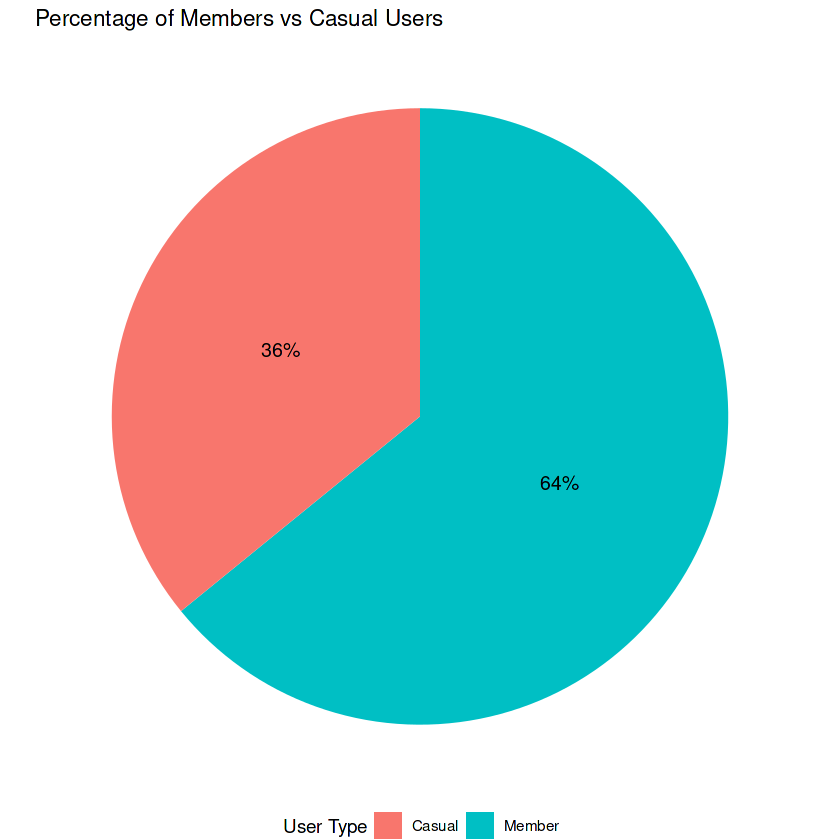

In [18]:
# Create the pie chart
ggplot(percentage_data, aes(x = "", y = Percentage, fill = UserType)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = paste0(round(Percentage), "%")), position = position_stack(vjust = 0.5), size = 4) +
  coord_polar("y", start = 0) +
  labs(title = "Percentage of Members vs Casual Users",
       fill = "User Type",
       x = NULL,
       y = NULL) +
  theme_void() +
  theme(legend.position = "bottom")

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
## The most used stations

In [51]:
### Show top 10 starting stations

# Filter out "Unknown" station names
ridership_by_station <- yearly_data_v2 %>%
  filter(start_station_name != "Unknown") %>%
  group_by(start_station_name) %>%
  summarise(number_of_rides = n()) %>%
  arrange(desc(number_of_rides)) # Arrange in descending order of number_of_rides
#get top 10
ridership_by_station_top_10 <-ridership_by_station %>% arrange() %>% head(10)
ridership_by_station_top_10

start_station_name,number_of_rides
<chr>,<int>
Streeter Dr & Grand Ave,63294
DuSable Lake Shore Dr & Monroe St,40450
Michigan Ave & Oak St,37488
DuSable Lake Shore Dr & North Blvd,36106
Clark St & Elm St,35557
Kingsbury St & Kinzie St,35309
Wells St & Concord Ln,33260
Clinton St & Washington Blvd,33183
Wells St & Elm St,30373


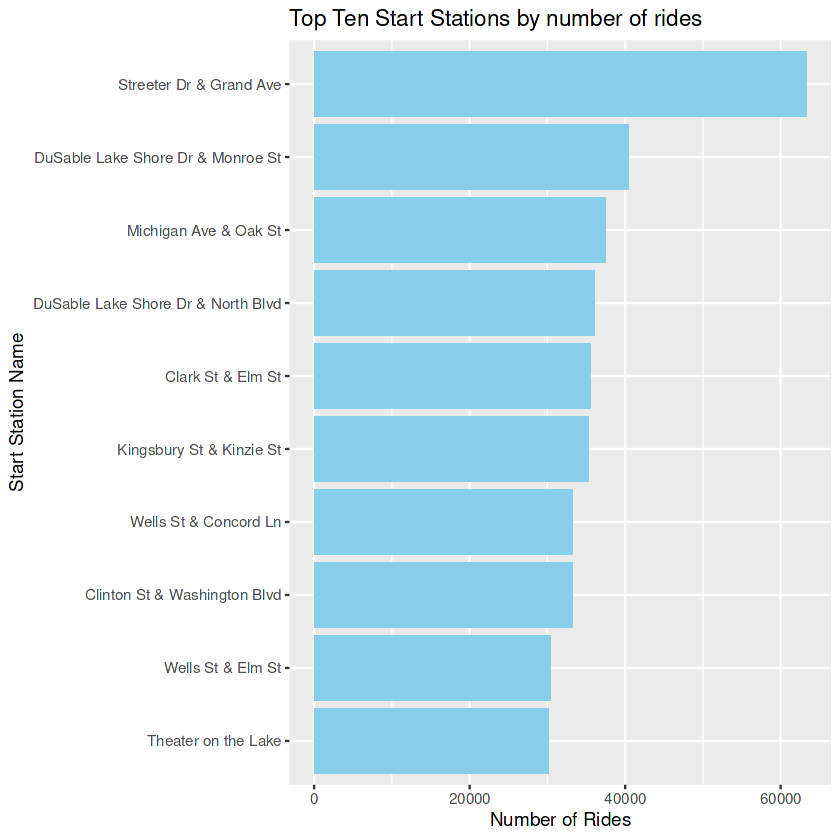

In [52]:
# Plot
ggplot(ridership_by_station_top_10, aes(y = reorder(start_station_name, number_of_rides), x = number_of_rides )) +
  geom_bar(stat = "identity", position = "dodge",fill = "skyblue") +
  theme(axis.text.y = element_text(angle = 0, hjust = 1, vjust = 0.5)) +
  labs(x = "Number of Rides", y = "Start Station Name", title = "Top Ten Start Stations by number of rides")



<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### The busiest days of the week

In [144]:

# Define the order of days of the week
days_order <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
# Aggregate number of rides by day of the week
rides_by_day <- yearly_data_v2 %>%mutate(day_of_week = factor(day_of_week, levels = days_order))%>%
  group_by( day_of_week) %>%
  summarise(number_of_rides = n())

rides_by_day

day_of_week,number_of_rides
<fct>,<int>
Sunday,727355
Monday,725811
Tuesday,812405
Wednesday,845670
Thursday,881566
Friday,842962
Saturday,871103


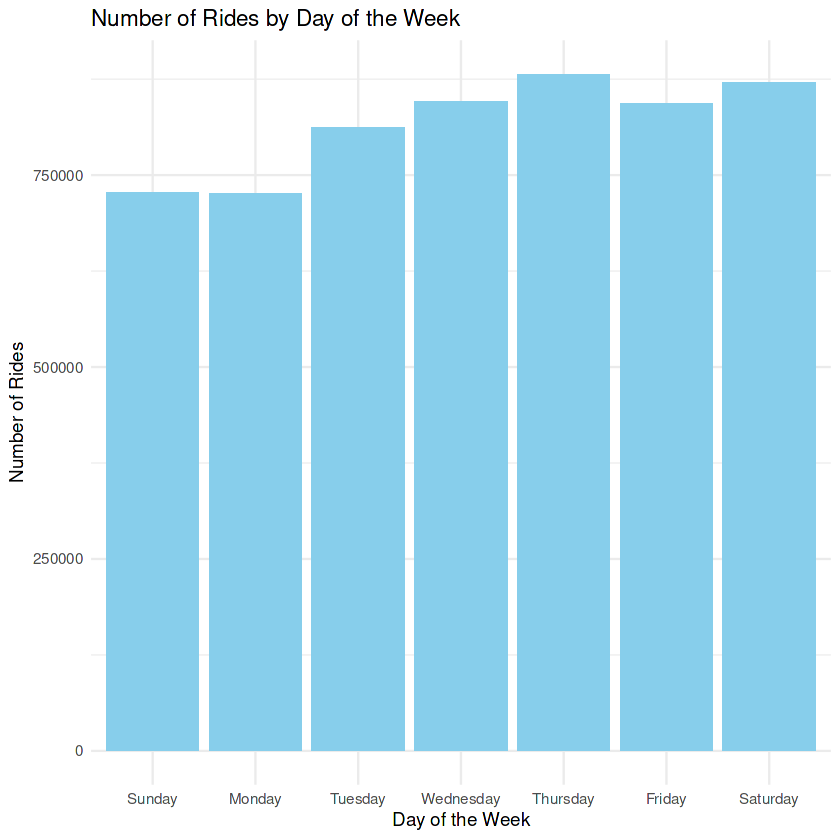

In [142]:
# Plot number of rides by day for each user type
ggplot(rides_by_day, aes(x = day_of_week,-number_of_rides, y = number_of_rides)) +
  geom_bar(stat = "identity", position = "dodge",fill="skyblue") +
  labs(title = "Number of Rides by Day of the Week",
       x = "Day of the Week",
       y = "Number of Rides") +
  theme_minimal()

# Output the result of aggregation

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### The busiest months

In [145]:
# Aggregate number of rides by user type and month
rides_by_month <- yearly_data_v2 %>%
  mutate(month_name = month.name[as.integer(month)]) %>%
  group_by(member_casual, month_name) %>%
  summarise(number_of_rides = n()) 

rides_by_month

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month_name,number_of_rides
<chr>,<chr>,<int>
casual,April,147284
casual,August,311095
casual,December,51670
casual,February,47161
casual,January,24458
casual,July,331344
casual,June,301226
casual,March,62201
casual,May,234178


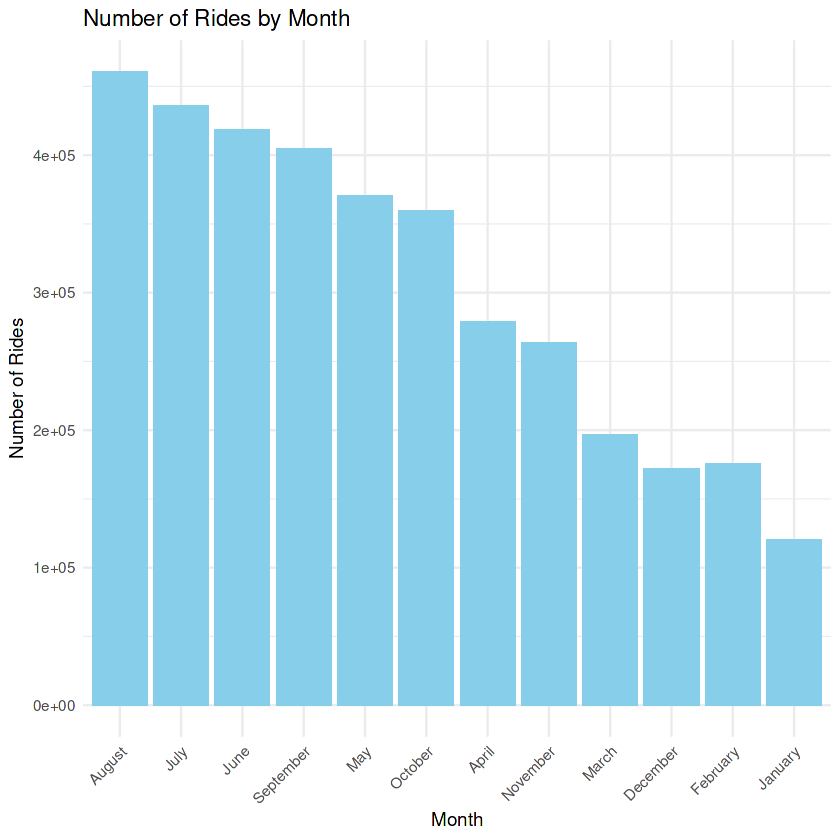

In [146]:
# Plot number of rides by month
ggplot(rides_by_month, aes(x = reorder(month_name,-number_of_rides), y = number_of_rides)) +
  geom_col(position = "dodge",fill="skyblue") +
  labs(title = "Number of Rides by Month",
       x = "Month",
       y = "Number of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Most used bike types


In [147]:

# Aggregate number of rides by rideable type
rideable_type_count_summary <- yearly_data_v2 %>% 
  group_by(rideable_type) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(desc(number_of_rides))

rideable_type_count_summary

rideable_type,number_of_rides
<chr>,<int>
electric_bike,2899894
classic_bike,2732624
docked_bike,74354


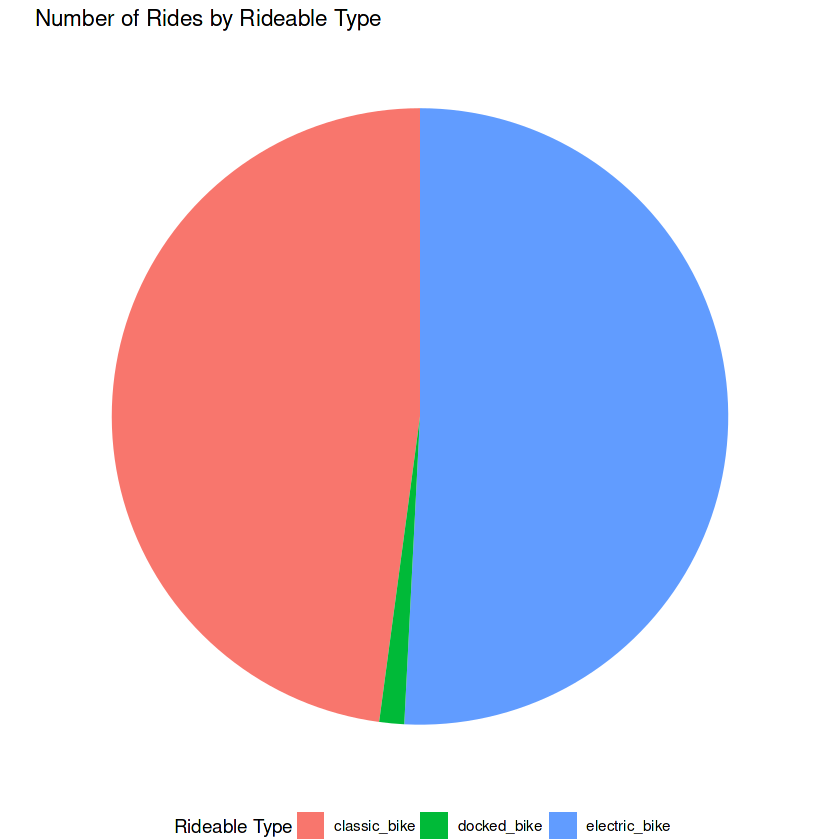

In [137]:
# Plot number of rides by rideable type as a pie chart
ggplot(rideable_type_count_summary, aes(x = "", y = number_of_rides, fill = rideable_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Number of Rides by Rideable Type",
       fill = "Rideable Type") +
  theme_void() +
  theme(legend.position = "bottom")

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
## 4.2 Identifying trends and relationships



<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Ride length: members vs casual customers


In [89]:
# Aggregate ride length statistics by user type
ride_length_by_cust <- yearly_data_v2 %>%
  group_by(member_casual) %>%
  summarise(mean_ride_length_minutes = mean(ride_length / 60))
ride_length_by_cust

member_casual,mean_ride_length_minutes
<chr>,<dbl>
casual,28.30534
member,12.74807


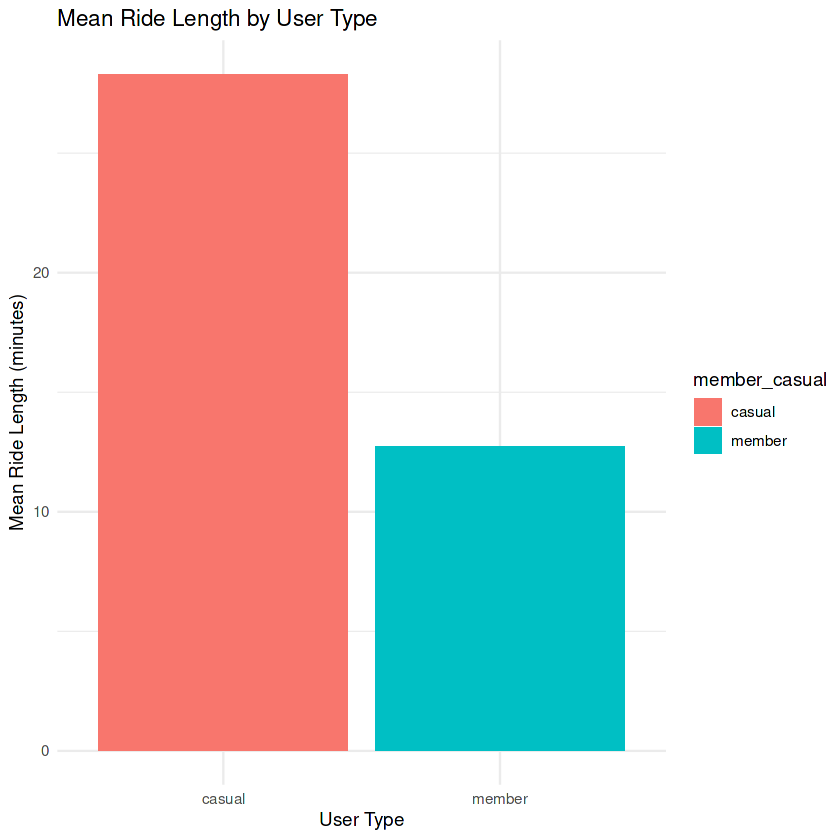

In [90]:
# Plot mean ride length
ggplot(ride_length_by_cust, aes(x = member_casual, y = mean_ride_length_minutes, fill = member_casual)) +
  geom_bar(stat = "identity") +
  labs(title = "Mean Ride Length by User Type",
       x = "User Type",
       y = "Mean Ride Length (minutes)") +
  theme_minimal()

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Key insights

Casual users have a significantly higher mean ride length of approximately 28.31 minutes compared to members, who have a mean ride length of approximately 12.75 minutes.
This suggests that casual users tend to use the ride service for longer durations compared to members.

**Possible explanation**

Casual users might use the service for leisurely rides or longer trips, while members might utilize it more for short, utilitarian trips or commuting.

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Average number of rides by hour of the day: members vs casual users

In [149]:
# Aggregate number of rides by user type and hour of the day
rides_by_hour_cust_type <- yearly_data_v2 %>%
  group_by(member_casual, hour_of_day) %>%
  summarise(number_of_rides = n())

# Arrange the data by the number of rides in descending order
rides_by_hour_cust_type <- arrange(rides_by_hour_cust_type, desc(number_of_rides))
rides_by_hour_cust_type



`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,hour_of_day,number_of_rides
<chr>,<dbl>,<int>
member,17,389125
member,16,333426
member,18,306915
member,15,246987
member,8,245634
member,19,216859
member,14,201956
member,12,199182
casual,17,198849


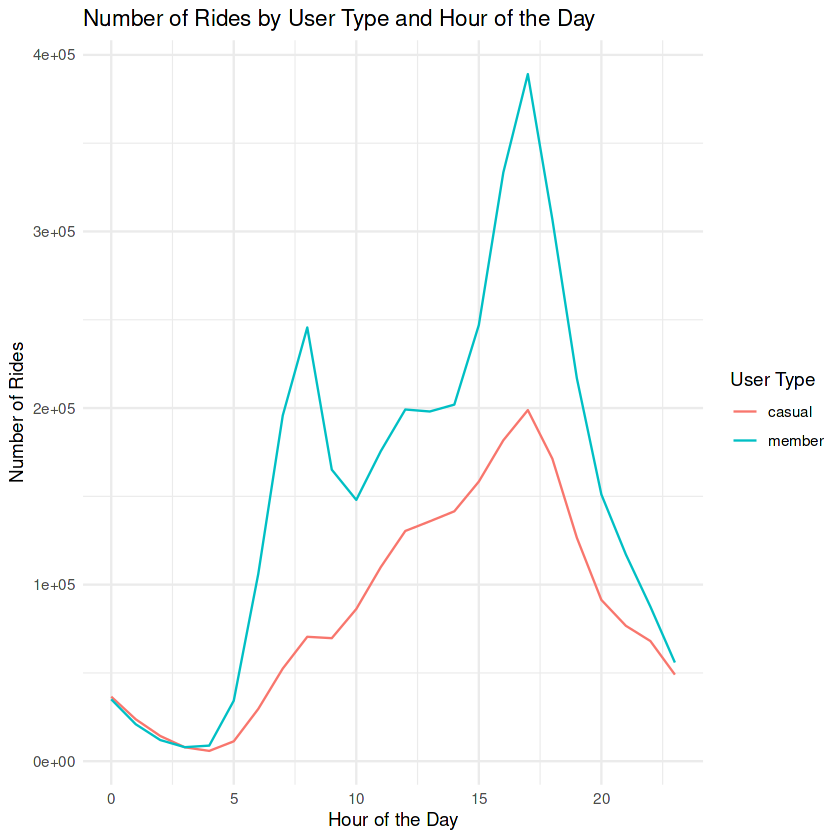

In [135]:

# Plot number of rides by user type and hour of the day
ggplot(rides_by_hour_cust_type, aes(x = hour_of_day, y = number_of_rides, color = member_casual)) +
  geom_line() +
  labs(title = "Number of Rides by User Type and Hour of the Day",
       x = "Hour of the Day",
       y = "Number of Rides",
       color = "User Type") +
  theme_minimal()


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">

### Key Insights:
- Members tend to ride more during the afternoon and evening hours, with peak ride counts occurring around 17:00 and 18:00.
- Casual riders, on the other hand, exhibit a more dispersed pattern, with relatively lower ride counts compared to members. Their peak ride times vary but generally occur during late afternoon to early evening.

Possible Explanations:
- Members' consistent usage during afternoon and evening hours suggests they might be commuting from work or engaging in routine activities, utilizing bike-sharing as part of their daily transportation.
- The dispersed pattern of casual riders could indicate leisurely or spontaneous usage, with rides possibly influenced by factors such as weather, tourist activities, or recreational outings, leading to varying peak times throughout the day.

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Average number of rides by day of the week: members vs casual users

In [115]:
# Define the order of days of the week
days_order <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

# Aggregate number of rides by user type and day of the week
rides_by_day_cust_type <- yearly_data_v2 %>%
  mutate(day_of_week = factor(day_of_week, levels = days_order)) %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_rides = n())

# Output the result of aggregation
rides_by_day_cust_type


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_rides
<chr>,<fct>,<int>
casual,Sunday,328816
casual,Monday,232774
casual,Tuesday,243464
casual,Wednesday,249630
casual,Thursday,274333
casual,Friday,312199
casual,Saturday,406416
member,Sunday,398539
member,Monday,493037


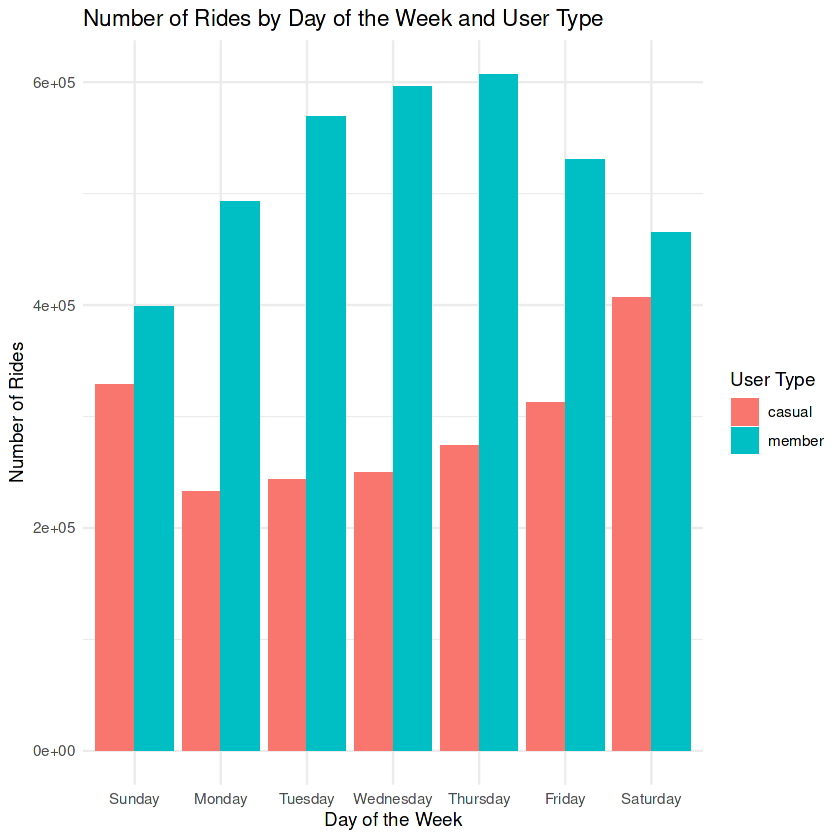

In [121]:


# Plot number of rides by day for each user type
ggplot(rides_by_day_cust_type, aes(x =day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Rides by Day of the Week and User Type",
       x = "Day of the Week",
       y = "Number of Rides",
       fill = "User Type") +
  theme_minimal()




<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Key insights

**Weekday vs. Weekend Differences**: Most rides by casual clients happen on the weekend

* Possible explanation

**Casual Users**: Casual users tend to have longer ride durations on weekends (Saturday and Sunday) compared to weekdays. This could be because weekends provide more leisure time for users to explore the city or engage in recreational activities, leading to longer rides.

**Member Users**: Similar to casual users, member users also exhibit longer ride durations on weekends. However, the difference between weekdays and weekends may not be as pronounced for members, as they might use the bike-sharing service for commuting or errands regardless of the day.

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Average number of rides by month 

In [27]:
# Aggregate number of rides by user type and month
rides_by_month_by_cust <- yearly_data_v2 %>%
  mutate(month_name = month.name[as.integer(month)]) %>%
  group_by(member_casual, month_name) %>%
  summarise(number_of_rides = n()) 

rides_by_month_by_cust %>% arrange(-number_of_rides)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month_name,number_of_rides
<chr>,<chr>,<int>
member,August,460538
member,July,436276
member,June,418385
member,September,404718
member,May,370639
member,October,360022
casual,July,331344
casual,August,311095
casual,June,301226


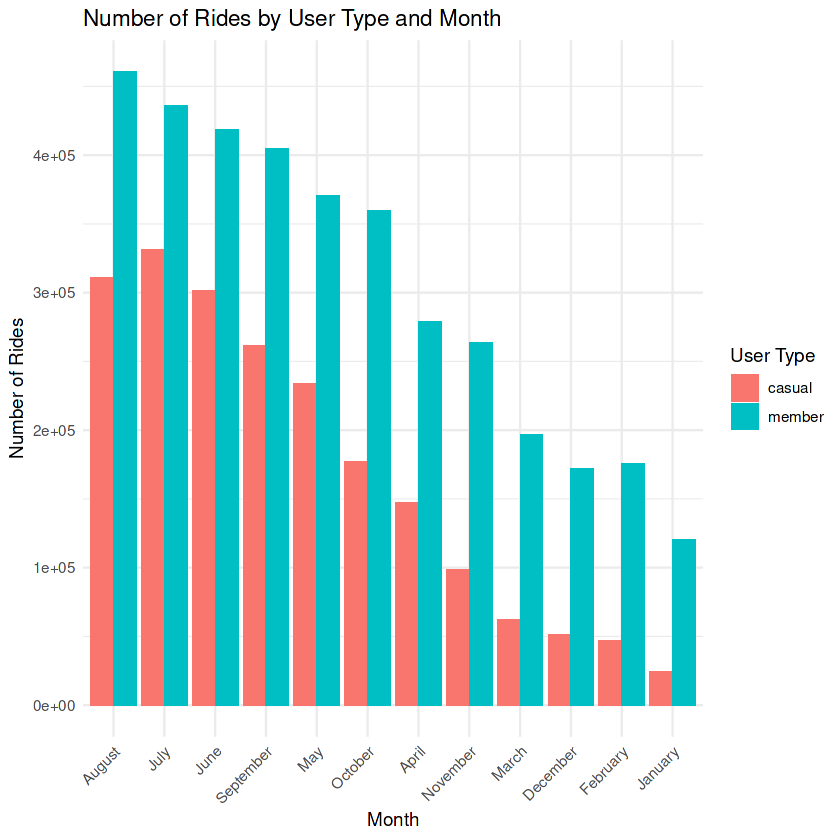

In [28]:
# Plot number of rides by month for each user type
ggplot(rides_by_month_by_cust, aes(x = reorder(month_name,-number_of_rides), y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by User Type and Month",
       x = "Month",
       y = "Number of Rides",
       fill = "User Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Number of rides by client type split by season

In [30]:
### Create a new column for season based on month
# Convert 'month' column to numeric if it's not already numeric
yearly_data_v2$month <- as.numeric(as.character(yearly_data_v2$month))

# Create a new column for season based on month
yearly_data_v2 <- yearly_data_v2 %>%
  mutate(season_name = cut(month,
                           breaks = c(0, 2, 5, 8, 11, 12),
                           labels = c("Winter", "Spring", "Summer", "Fall", "Winter"),
                           include.lowest = TRUE))


# Aggregate number of rides by user type and season
rides_by_season_by_cust <- yearly_data_v2 %>%
 group_by(member_casual, season_name) %>%
summarise(number_of_rides = n()) 
rides_by_season_by_cust %>% arrange(-number_of_rides)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,season_name,number_of_rides
<chr>,<fct>,<int>
member,Summer,1315199
member,Fall,1028837
casual,Summer,943665
member,Spring,846418
casual,Fall,537015
member,Winter,468786
casual,Spring,443663
casual,Winter,123289


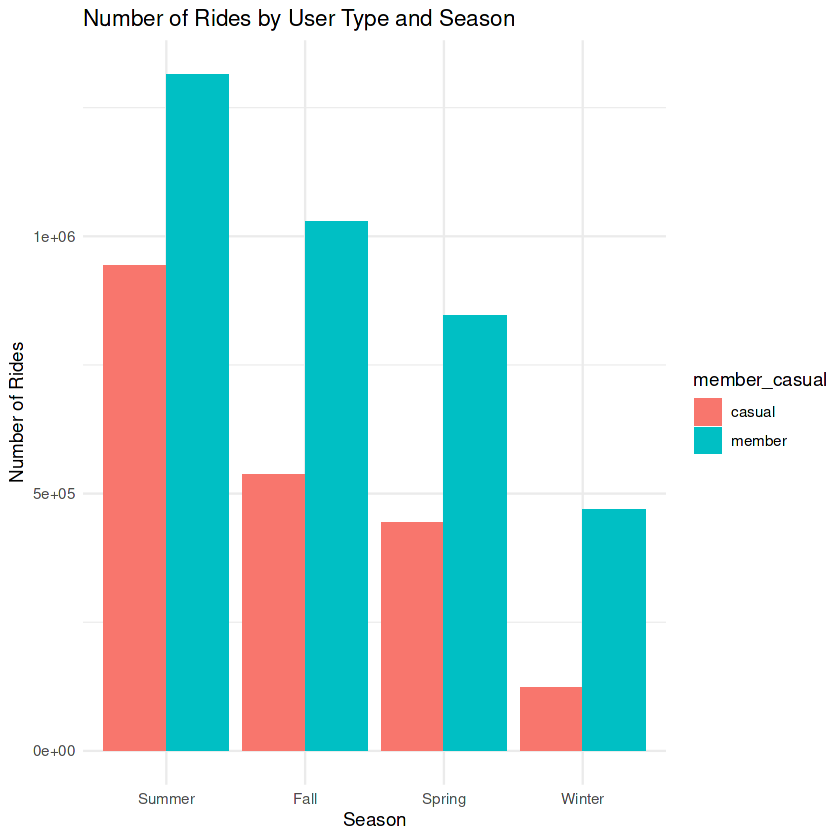

In [31]:
library(ggplot2)

# Plot aggregated number of rides by user type and season
ggplot(rides_by_season_by_cust, aes(x =reorder(season_name,-number_of_rides) , y = number_of_rides, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Season", y = "Number of Rides", title = "Number of Rides by User Type and Season") +
  theme_minimal()


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Key Insights

**Seasonal Ride Distribution:** Both casual and member riders demonstrate seasonal variations in ride numbers, with peaks during Spring and Summer, and declines during Winter and Autumn.

#### Possible Explanations:

**Weather Influence**: Warmer seasons, particularly Spring and Summer, likely encourage higher bike usage among both casual and member riders due to more favorable weather conditions. Conversely, colder seasons such as Winter and Autumn may deter some riders, especially casual users, resulting in reduced ride numbers.

**Tourism and Outdoor Activities**: Spring and Summer are associated with increased outdoor activities and tourism, potentially driving higher ride numbers as individuals explore the city or tourist attractions using bike-sharing services. Members may also utilize bike-sharing for leisure or commuting during these seasons, contributing to the observed peak in ride numbers.</p></div>

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
        
### Difference between seasons in ride length

In [35]:


# Aggregate number of rides by user type and season
ride_time_by_season_cust <-yearly_data_v2 %>% group_by(season_name,member_casual) %>% 
summarize(ride_length_sum = mean(ride_length/60)) %>% 
arrange(-ride_length_sum)
 
ride_time_by_season_cust %>% arrange(-ride_length_sum)

`summarise()` has grouped output by 'season_name'. You can override using the
`.groups` argument.


season_name,member_casual,ride_length_sum
<fct>,<chr>,<dbl>
Summer,casual,32.36021
Spring,casual,27.24241
Fall,casual,23.45554
Winter,casual,22.21849
Summer,member,13.56371
Winter,member,12.60047
Fall,member,12.39395
Spring,member,11.99289


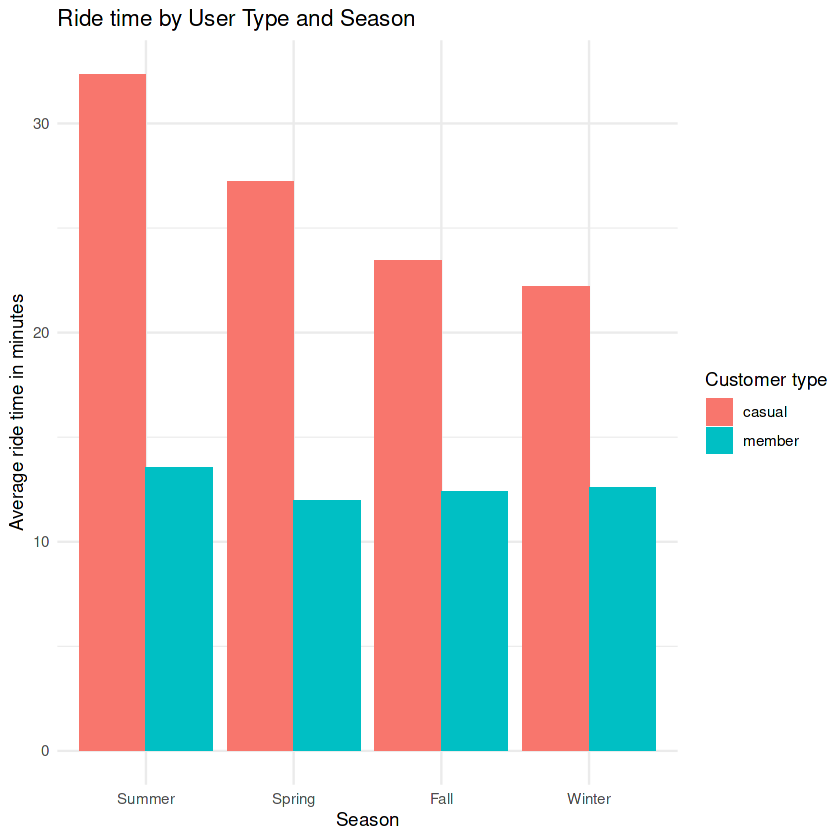

In [37]:
# Plot aggregated number of rides by user type and season
ggplot(ride_time_by_season_cust, aes(x =reorder(season_name,-ride_length_sum) , y = ride_length_sum, fill = member_casual)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Season", y = "Average ride time in minutes", title = "Ride time by User Type and Season",fill = "Customer type") +
    theme_minimal()


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
  
### Key insights
    
**Longer rides for casuals**
        
While the previous analysis highlighted the seasonal variations in ride numbers between casual and member riders, further examination reveals an interesting contrast in ride duration. Despite members demonstrating a higher frequency of rides across all seasons, casual customers consistently surpass members in terms of ride time. 

**Distinct usage patterns between casual and member riders**

**Consistency vs. Flexibility** : Member riders exhibit a consistent pattern of ride times across seasons, with relatively stable average ride times. This consistency implies that members might use bikes more regularly, possibly for daily commuting or routine activities.

**Variability vs. Stability** In contrast, casual riders demonstrate more variability in ride times across seasons, with noticeable fluctuations. This variability suggests that casual riders may use bikes less frequently and in a more ad-hoc manner, likely for leisurely purposes such as tourism or city exploration.

**Short vs. Long Rides** Despite members' consistent usage, their average ride times are notably shorter compared to casual riders. This indicates that members might prioritize shorter rides, possibly for practical purposes like commuting, whereas casual riders engage in longer rides, potentially for recreational or sightseeing activities.

**Seasonal Trends** Both casual and member riders exhibit higher ride times during the summer season, implying a shared preference for longer rides in warmer weather. However, the magnitude of this increase is more pronounced for casual riders, reinforcing the notion that they may utilize bikes more extensively for leisure activities during peak tourist seasons. 
        
### Possible explanations

        
Casual riders, often leisure or tourism-oriented, opt for longer rides, particularly during peak tourist seasons like summer, to fully explore the city. In contrast, member riders, who primarily use bikes for commuting, prefer shorter rides consistently across all seasons. This difference in usage aligns with the stable ride times observed among members throughout the year, whereas casual riders' ride durations fluctuate seasonally, reflecting their sporadic usage patterns influenced by weather and tourism trends.










</div>

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Number of rides by rideable type


rideable_type,number_of_rides
<chr>,<int>
electric_bike,2899894
classic_bike,2732624
docked_bike,74354


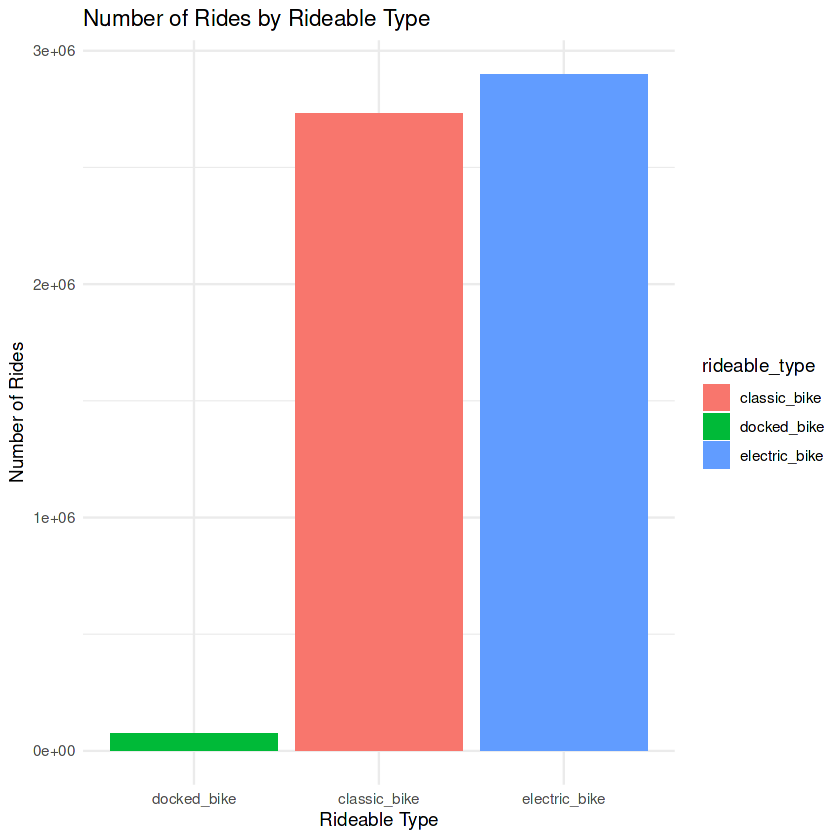

In [151]:
# Aggregate number of rides by rideable type
rideable_type_count_summary <- yearly_data_v2 %>% 
  group_by(rideable_type) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(desc(number_of_rides))

# Plot number of rides by rideable type
ggplot(rideable_type_count_summary, aes(x = reorder(rideable_type, number_of_rides), y = number_of_rides, fill = rideable_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Rides by Rideable Type",
       x = "Rideable Type",
       y = "Number of Rides") +
  theme_minimal()
ride_count_summary


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Key insights

**Electric Bikes Dominance:**

The data indicates that electric bikes have the highest number of rides compared to classic bikes and docked bikes.

**Classic Bikes Usage:**

Classic bikes, while slightly less popular than electric bikes, still constitute a significant portion of the total number of rides.

**Docked bikes Usage:**

Docked bikes have the lowest number of rides compared to electric and classic bikes.

* Possible explanation:

**Electric bikes** offer users an additional level of convenience due to their assisted pedaling feature, making them popular among riders, especially for longer distances or hilly terrains. Additionally, electric bikes might attract users seeking a faster and less strenuous biking experience.


**Classic bikes** are likely preferred by users who are accustomed to traditional biking experiences or prefer a more active form of transportation without motor assistance. They may also be favored for shorter commutes or leisurely rides in areas with flat terrain.


**Docked bikes** require users to pick up and return bikes to specific docking stations, which may limit their convenience and accessibility compared to electric and classic bikes, especially for one-way trips. Additionally, docked bikes may be less visible or accessible in certain areas, leading to lower usage rates.


Rideable type vs season

In [88]:
# Aggregate number of rides by rideable type and season
ride_count_summary_season <- yearly_data_v2 %>% 
  group_by(rideable_type, season_name) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(season_name, desc(number_of_rides))

ride_count_summary_season

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


rideable_type,season_name,number_of_rides
<chr>,<fct>,<int>
classic_bike,Winter,321420
electric_bike,Winter,270655
electric_bike,Spring,718372
classic_bike,Spring,546710
docked_bike,Spring,24999
electric_bike,Summer,1136874
classic_bike,Summer,1072635
docked_bike,Summer,49355
classic_bike,Fall,791859


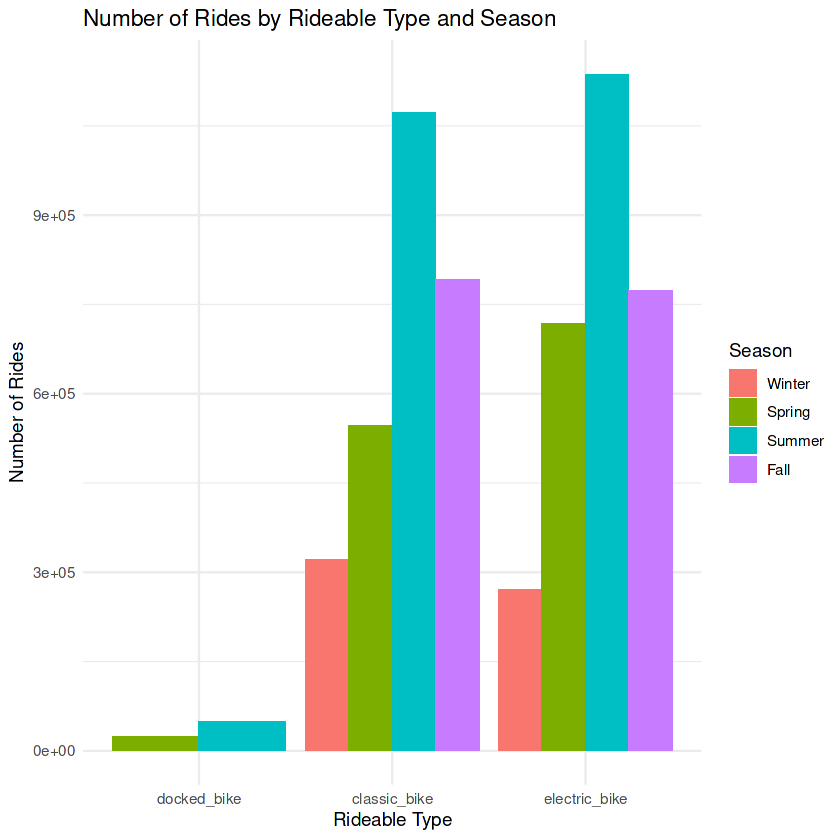

In [87]:
# Plot number of rides by rideable type and season
ggplot(ride_count_summary_season, aes(x = reorder(rideable_type, number_of_rides), y = number_of_rides, fill = season_name)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Rides by Rideable Type and Season",
       x = "Rideable Type",
       y = "Number of Rides",
       fill = "Season") +
  theme_minimal()


### Key Insights:
- **Electric bikes** experience peak usage during **Summer** (1,136,874 rides) and **Fall** (773,993 rides), indicating their popularity during warmer seasons.
- **Classic bikes** are also highly utilized, particularly in **Summer** (1,072,635 rides) and **Fall** (791,859 rides).
- **Docked bikes** show comparatively lower usage across all seasons.

### Possible Explanations:
- The peak usage of **electric bikes** during **Summer** and **Fall** could be attributed to favorable weather conditions and increased outdoor activities during these seasons.
- **Classic bikes** remain a popular choice, especially during warmer seasons, likely due to their widespread availability and familiarity among riders.
- The consistent lower usage of **docked bikes** suggests that they may not be as preferred or accessible compared to electric and classic bikes, regardless of the season.

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Top ten start station names by customer type


In [78]:
# Filter out "Unknown" station names
ridership_by_station <- yearly_data_v2 %>%
  filter(start_station_name != "Unknown") %>%
  group_by(start_station_name, member_casual) %>%
  summarise(number_of_rides = n()) %>%
  arrange(-number_of_rides)

# Filter for top ten stations based on total number of rides
top_ten_stations <- ridership_by_station %>%
  group_by(start_station_name) %>%
  summarise(total_rides = sum(number_of_rides)) %>%
  top_n(10, total_rides) %>%
  pull(start_station_name)

# Filter the original data for only the top ten stations
ridership_by_station_top_ten <- ridership_by_station %>%
  filter(start_station_name %in% top_ten_stations)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


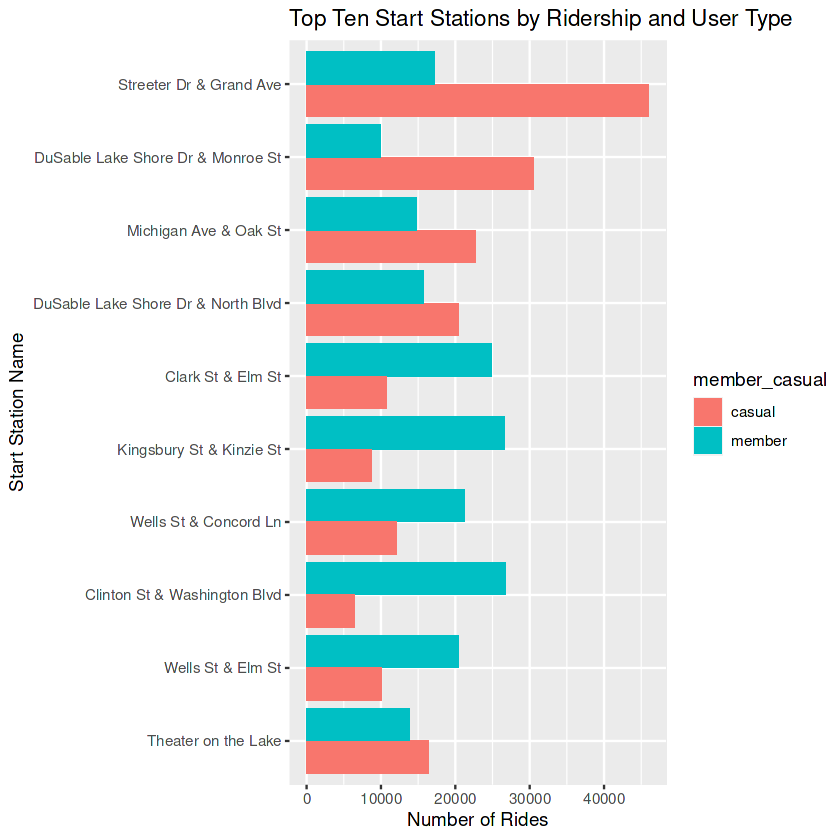

In [80]:
# Plot with start station names reordered in descending order based on the number of rides
ggplot(ridership_by_station_top_ten, aes(y = reorder(start_station_name, number_of_rides), x = number_of_rides, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(axis.text.y = element_text(angle = 0, hjust = 1, vjust = 0.5)) +
  labs(x = "Number of Rides", y = "Start Station Name", title = "Top Ten Start Stations by Ridership and User Type")


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
### Key insights

Start stations such as Streeter Dr & Grand Ave and DuSable Lake Shore Dr & Monroe St appear to have high overall ride volumes.


* Possible Explanation:

These start stations may be strategically located in busy areas with high foot traffic, tourist attractions, or convenient access to public transportation. The popularity of these stations among both casual and member users suggests their importance as key hubs in the bike-sharing network.

### Combining top stations and seasons for casual customers

In [85]:
# Filter data for the summer season and casual riders
summer_casual_riders <- yearly_data_v2 %>%
    filter(season_name == "Summer" & member_casual == "casual" & start_station_name != "Unknown")

# Group by start station name and summarise number of rides
ridership_by_station_summer_casual <- summer_casual_riders %>%
    group_by(start_station_name) %>%
    summarise(number_of_rides = n()) %>%
    arrange(desc(number_of_rides)) %>%
    head(10)  # Select top ten stations

# Display the result
ridership_by_station_summer_casual



start_station_name,number_of_rides
<chr>,<int>
Streeter Dr & Grand Ave,23512
DuSable Lake Shore Dr & Monroe St,14697
Michigan Ave & Oak St,12312
DuSable Lake Shore Dr & North Blvd,12165
Millennium Park,9619
Theater on the Lake,9158
Shedd Aquarium,8027
Dusable Harbor,7448
Montrose Harbor,7239


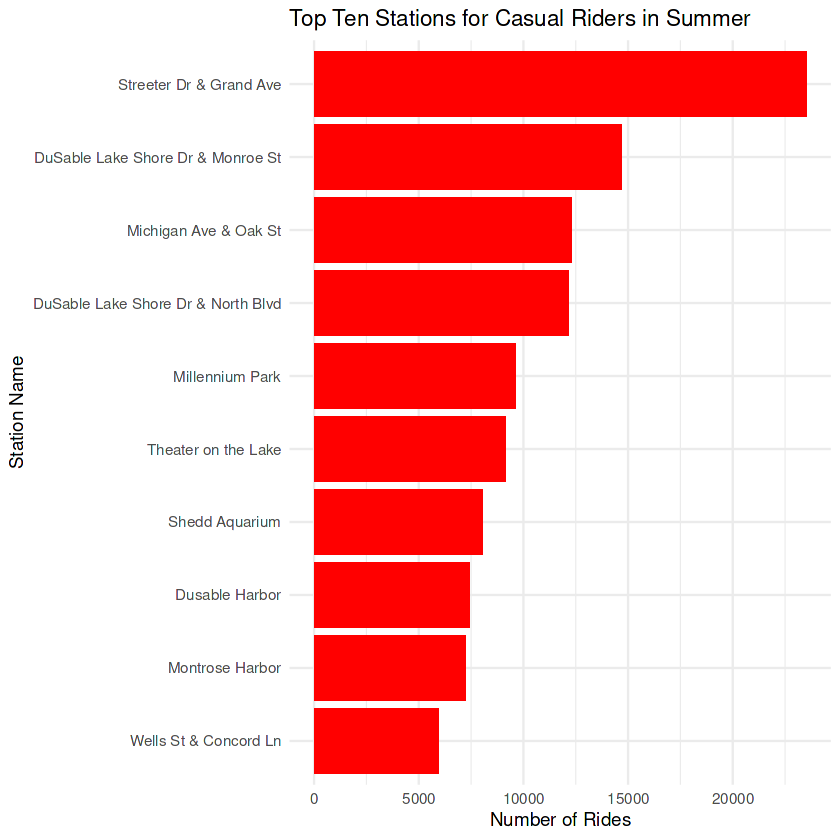

In [84]:
library(ggplot2)

# Plotting the top ten stations for casual riders in summer
ggplot(ridership_by_station_summer_casual, aes(x = reorder(start_station_name, number_of_rides), y = number_of_rides)) +
  geom_bar(stat = "identity", fill = "red") +
  coord_flip() +
  labs(title = "Top Ten Stations for Casual Riders in Summer",
       x = "Station Name",
       y = "Number of Rides") +
  theme_minimal()

<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;">Step 5: Sharing findings

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    

## 5.1 The importance of visualizations

The previous step of data analysis included visualizations that are used to simplify the results and make it easy to read through the analysis process. Bar plots of aggregated data give a quick and simplified view of trends and make a good way to share the findings with stakeholders.


## 5.2 Exporting summary for further visualizations

### Export the main analysis dataframes

Each part of trend analysis is exported into a csv file which can be used in an external visualization tool such as Tableau or PowerBI

In [152]:
# Export ridership_by_station_summer_casual to CSV
write.csv(ridership_by_station_summer_casual, "ridership_by_station_summer_casual.csv", row.names = FALSE)

# Export ridership_by_station_top_ten to CSV
write.csv(ridership_by_station_top_ten, "ridership_by_station_top_ten.csv", row.names = FALSE)

# Export ride_count_summary_season to CSV
write.csv(ride_count_summary_season, "ride_count_summary_season.csv", row.names = FALSE)

# Export rideable_type_count_summary to CSV
write.csv(rideable_type_count_summary, "rideable_type_count_summary.csv", row.names = FALSE)

# Export ride_time_by_season_cust to CSV
write.csv(ride_time_by_season_cust, "ride_time_by_season_cust.csv", row.names = FALSE)

# Export rides_by_season_by_cust to CSV
write.csv(rides_by_season_by_cust, "rides_by_season_by_cust.csv", row.names = FALSE)

# Export rides_by_month_by_cust to CSV
write.csv(rides_by_month_by_cust, "rides_by_month_by_cust.csv", row.names = FALSE)

# Export rides_by_day_cust_type to CSV
write.csv(rides_by_day_cust_type, "rides_by_day_cust_type.csv", row.names = FALSE)

# Export rides_by_hour_cust_type to CSV
write.csv(rides_by_hour_cust_type, "rides_by_hour_cust_type.csv", row.names = FALSE)

# Export ride_length_by_cust to CSV
write.csv(ride_length_by_cust, "ride_length_by_cust.csv", row.names = FALSE)

# Export rides_by_month to CSV
write.csv(rides_by_month, "rides_by_month.csv", row.names = FALSE)

# Export rides_by_day to CSV
write.csv(rides_by_day, "rides_by_day.csv", row.names = FALSE)

# Export ridership_by_station_top_10 to CSV
write.csv(ridership_by_station_top_10, "ridership_by_station_top_10.csv", row.names = FALSE)

# Export percentage_data to CSV
write.csv(percentage_data, "percentage_data.csv", row.names = FALSE)


<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
We will also include a summary of our analysis that can be used to create further visualizations using Tableau or PowerBI.

### Create a csv file that we will visualize in Excel, Tableau, or any other presentation software

* Aggregate ride length by member_casual, day_of_week, and start_station_name

In [153]:
counts <- aggregate(yearly_data_v2$ride_length ~ yearly_data_v2$member_casual + yearly_data_v2$day_of_week + yearly_data_v2$start_station_name, FUN = mean)

# Print the first few rows of counts
head(counts)

write.csv(counts, file = 'counts.csv')

,yearly_data_v2$member_casual,yearly_data_v2$day_of_week,yearly_data_v2$start_station_name,yearly_data_v2$ride_length
,<chr>,<chr>,<chr>,<dbl>
1,casual,Friday,,771.7216
2,member,Friday,,718.4157
3,casual,Monday,,777.8876
4,member,Monday,,680.4554
5,casual,Saturday,,867.1169
6,member,Saturday,,776.7220


<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;">Step 6: Act



<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    
## Recommendations 






<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    

Based on the analysis conducted to understand the differences in bike usage patterns between annual members and casual riders, as well as the key insights derived from the data, we can formulate detailed recommendations tailored to target casual clients and encourage them to become annual members. Here are the recommendations:

1. **Enhance Bike Availability and Variety:**
   - Increase the availability of electric bikes, which dominate in terms of ride numbers, at popular start stations frequented by casual riders. This ensures that casual riders have access to their preferred bike types, enhancing their overall experience.
   - Offer a variety of classic bikes, which constitute a significant portion of the total rides, at stations with high casual rider traffic. Providing a diverse range of bikes caters to different user preferences and encourages usage among casual riders.

2. **Discounted Rates for Classic Bikes for Annual Members:**
   - Introduce discounted rates for annual members when renting classic bikes. This special offer incentivizes casual riders to upgrade to annual membership by providing cost savings on their preferred bike type, thus increasing the likelihood of conversion.

3. **Special Offers Based on Usage Patterns:**
    - Provide special subscription offers for casual riders who subscribe on their preferred weekdays, especially weekends. This targeted promotion aligns with casual riders' usage patterns, particularly their tendency for longer rides, especially during peak tourist seasons like summer. By offering exclusive benefits for riding on their preferred days and acknowledging their preference for extended rides, this strategy aims to incentivize casual riders to commit to an annual membership.
  


4. **Promotional Packages for Favorite Stations:**
   - Design promotional packages that include benefits such as discounted rates or extended ride times for casual riders' favorite start stations. By offering incentives specific to their preferred locations, casual riders are motivated to become annual members and enjoy exclusive perks at their favorite stations.

5. **Increase Marketing Efforts in Preferred Stations:**
   - Implement targeted marketing campaigns with more advertisements in popular start stations frequented by casual riders. Increased visibility and promotional content in their favorite stations enhance brand awareness and encourage casual riders to explore the benefits of annual membership.

6. **Membership Tiers Aligned with Usage Patterns:**
   - Introduce membership tiers with varying levels of included ride time or benefits tailored to casual riders' usage patterns. By offering personalized membership options based on their preferences, casual riders feel valued and are more likely to commit to an annual membership.

7. **Summer Promotion Recommendation:**

    - Introduce a "Summer Ride Pass" promotion targeted specifically at casual riders during the summer months. This pass could offer unlimited rides for a set duration, such as a month or the entire summer season, at a discounted rate compared to regular pay-per-ride fees. Emphasize the value of the pass for exploring the city, staying active, and enjoying the outdoors during the warmer months. 



<h1 style="background-color:#FF8000; color:#000; font-size:32px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;">Conclusion

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    

        

In conclusion, the data analysis conducted on Cyclistic's historical trip data has provided valuable insights into the usage patterns of annual members and casual riders. By following the data analysis process of Ask, Prepare, Process, Analyze, Share, and Act, we have gained a deeper understanding of how these customer segments interact with the bike-share program differently.

The analysis revealed that annual members and casual riders exhibit distinct preferences and behaviors when it comes to bike usage. Annual members tend to use the service consistently throughout the year, while casual riders show fluctuating usage patterns influenced by seasons and specific weekdays, with a notable increase in rides during the summer months.

Key recommendations have been proposed to target casual riders and incentivize them to become annual members. These recommendations focus on enhancing bike availability, offering discounted rates for classic bikes, providing special offers based on usage patterns, designing promotional packages for favorite stations, increasing marketing efforts in preferred locations, and introducing membership tiers aligned with usage patterns.

Additionally, a specific recommendation for a "Summer Ride Pass" promotion targeting casual riders during the summer months has been proposed to capitalize on increased bike usage during this season.

Overall, the insights derived from the data analysis and the accompanying recommendations provide a strategic framework for Cyclistic to optimize its marketing strategies, improve customer engagement, and ultimately drive growth by converting casual riders into loyal annual members. By implementing these recommendations, Cyclistic can effectively cater to the diverse needs and preferences of its customer base, fostering long-term sustainability and success for the bike-share program.

<div style="background-color:#eaf7ea; padding: 20px;">
    <p style="font-size:20px; font-family:Georgia, serif; line-height: 1.7em; color:#003366;">
    

### Further analysis perspectives

**Demographic Analysis:**
Conduct a demographic analysis of annual members and casual riders to understand the composition of each segment in terms of age, gender, income level, and location. This analysis can help tailor marketing efforts more effectively by targeting demographics that show higher conversion rates or potential for growth.

**User Journey Mapping:**
Map out the user journey from initial awareness of the bike-share program to becoming a loyal annual member. Identify potential friction points or barriers that may deter casual riders from converting into annual members. Optimizing the user journey can streamline the conversion process and enhance customer retention.
